# Objective: Our main objective is to predict from if an Applicant will be issued visa based on given information by them

# Overview
#### RFE Request for extra document
### Are we trying to predict pre or post lottery 

#### Snapshot of Data Description for H1B_VISA
#### Reference: https://www.foreignlaborcert.doleta.gov/docs/Performance_Data/Disclosure/FY15-FY16/H-1B_FY16_Record_Layout.pdf

   # ![title](DataDesc1.png)
   # ![title](DataDesc2.png)

# More information related to data

In [1006]:
from IPython.core.display import display, HTML
display(HTML("""<a href="https://www.foreignlaborcert.doleta.gov/pdf/PerformanceData/2017/H-1B_Selected_Statistics_FY2017.pdf"> Click Here For Selected Statistics</a>"""))


#### Refer to the link below for brief overview of H1B visa
#### https://www.h1base.com/visa/work/H1B%20Visa%20Overview/ref/1164/

#### This is self learning project for immigration data

#### Installing required packages

In [1007]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing training and test set

In [1008]:
train=pd.read_csv("TrainH1BLast.csv")
test=pd.read_csv("TestH1BLast No Y values.csv")

#### Glimpse of the dataset

In [1009]:

train.head()

,Ob,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,1,DENIED,5/25/2017,5/25/2017,H-1B,9/21/2017,9/20/2020,VERTISYSTEM INC,NaN,39300 CIVIC CENTER DRIVE,...,Y,N,Y,Y,NaN,SUNNYVALE,SANTA CLARA,CA,94085,NaN
1,2,DENIED,11/4/2014,8/16/2017,H-1B,12/8/2014,12/7/2017,GOOGLE INC.,NaN,1600 AMPHITHEATRE PARKWAY,...,N,N,NaN,NaN,NaN,MOUNTAIN VIEW,SANTA CLARA,CA,94043,NaN
2,3,DENIED,10/6/2016,10/13/2016,H-1B,11/11/2016,11/10/2019,"KIMBERLY-CLARK WORLDWIDE, INC.",NaN,2001 MARATHON AVE.,...,N,N,NaN,NaN,NaN,NEENAH,WINNEBAGO,WI,54956,NaN
3,4,DENIED,8/14/2017,8/14/2017,H-1B,8/14/2017,8/14/2020,"EMBTEL, INC.",NaN,39159 PASEO PADRE PARKWAY,...,Y,N,Y,Y,NaN,CHARLOTTE,MECKLENBURG,NC,28202,NaN
4,5,DENIED,4/20/2017,4/20/2017,H-1B,10/16/2017,10/15/2020,"SPACE TIME INSIGHT, INC.",NaN,1850 GATEWAY DR.,...,N,N,NaN,NaN,NaN,MEMPHIS,SHELBY,TN,38125,NaN


In [1010]:
train.describe()

,Ob,NAICS_CODE,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,PREVAILING_WAGE,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,PUBLIC_DISCLOSURE_LOCATION
count,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4915.000000,4918.000000,4918.000000,0.0
mean,2459.500000,438568.020130,1.699268,0.766165,0.296869,0.110411,0.008337,0.231802,0.269622,71229.232574,2016.120041,82009.587885,25095.936682,NaN
std,1419.848642,204422.510048,3.857599,2.605320,1.166491,0.943281,0.105433,0.836398,1.224660,34648.534323,0.742782,48850.029727,53984.001841,NaN
min,1.000000,2122.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2001.000000,0.000000,0.000000,NaN
25%,1230.250000,424240.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55895.000000,2016.000000,61922.000000,0.000000,NaN
50%,2459.500000,541511.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69628.000000,2016.000000,75795.000000,0.000000,NaN
75%,3688.750000,541511.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88067.000000,2017.000000,100000.000000,0.000000,NaN
max,4918.000000,926130.000000,75.000000,75.000000,50.000000,50.000000,2.000000,15.000000,15.000000,336000.000000,2017.000000,850000.000000,804391.000000,NaN


In [1011]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4918 entries, 0 to 4917
Data columns (total 52 columns):
Ob                             4918 non-null int64
CASE_STATUS                    4918 non-null object
CASE_SUBMITTED                 4918 non-null object
DECISION_DATE                  4918 non-null object
VISA_CLASS                     4918 non-null object
EMPLOYMENT_START_DATE          4918 non-null object
EMPLOYMENT_END_DATE            4918 non-null object
EMPLOYER_NAME                  4918 non-null object
EMPLOYER_BUSINESS_DBA          375 non-null object
EMPLOYER_ADDRESS               4918 non-null object
EMPLOYER_CITY                  4918 non-null object
EMPLOYER_STATE                 4918 non-null object
EMPLOYER_POSTAL_CODE           4918 non-null object
EMPLOYER_COUNTRY               4084 non-null object
EMPLOYER_PROVINCE              47 non-null object
EMPLOYER_PHONE                 4084 non-null object
EMPLOYER_PHONE_EXT             207 non-null object
AGENT_REPRESEN

In [1012]:
train['CASE_STATUS'].unique()

array(['DENIED', 'CERTIFIED'], dtype=object)

In [1013]:
train['VISA_CLASS'].unique()
# Type of visa 

array(['H-1B', 'E-3 Australian', 'H-1B1 Singapore', 'H-1B1 Chile'],
      dtype=object)

##### Name of the columns 

In [1014]:
columnnames=train.columns

In [1015]:
# Here I have made a copy of column names in for the columns in dataset 
columnnames

Index(['Ob', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE', 'VISA_CLASS',
       'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME',
       'EMPLOYER_BUSINESS_DBA', 'EMPLOYER_ADDRESS', 'EMPLOYER_CITY',
       'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE', 'EMPLOYER_COUNTRY',
       'EMPLOYER_PROVINCE', 'EMPLOYER_PHONE', 'EMPLOYER_PHONE_EXT',
       'AGENT_REPRESENTING_EMPLOYER', 'AGENT_ATTORNEY_NAME',
       'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE', 'JOB_TITLE', 'SOC_CODE',
       'SOC_NAME', 'NAICS_CODE', 'TOTAL_WORKERS', 'NEW_EMPLOYMENT',
       'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
       'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY',
       'PW_WAGE_LEVEL', 'PW_SOURCE', 'PW_SOURCE_YEAR', 'PW_SOURCE_OTHER',
       'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY',
       'H1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'SUPPORT_H1B', 'LABOR_CON_AGREE',
       '

In [1016]:
len(train.columns)

52

In [1017]:
test.head()

,Ob,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,EMPLOYER_CITY,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,1,7/12/2017,7/13/2017,H-1B,12/1/2017,11/30/2020,8SIANMEDIA CORPORATION,NaN,25 E FOOTHILL BLVD,ARCADIA,...,N,N,NaN,Y,NaN,ARCADIA,LOS ANGELES,CA,91006,NaN
1,2,2/10/2017,2/14/2017,H-1B,2/27/2017,2/26/2020,"COROS WEARABLES, INC.",NaN,3310 NOBLE POND WAY,WOODBRIDGE,...,N,N,NaN,Y,NaN,WOODBRIDGE,PRINCE WILLIAM,VA,22193,NaN
2,3,3/16/2017,3/21/2017,H-1B,6/1/2017,5/31/2020,"RELIANT MEDICAL GROUP, INC.",NaN,100 FRONT STREET,WORCESTER,...,N,N,NaN,NaN,NaN,WORCESTER,WORCESTER,MA,1608,NaN
3,4,3/25/2017,3/28/2017,H-1B,3/27/2017,3/26/2020,MYTHRI CONSULTING LLC,NaN,1721 W PLANO PARKWAY,PLANO,...,Y,N,Y,Y,NaN,PLANO,COLLIN,TX,75075,NaN
4,5,1/11/2017,1/12/2017,E-3 Australian,3/1/2017,3/1/2019,MARYAM NASSIR ZADEH CORPORATION,MARYAM NASSIR ZADEH,123 NORFOLK ST,NEW YORK,...,NaN,NaN,NaN,NaN,NaN,NEW YORK,NEW YORK,NY,10002,NaN


In [1018]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 51 columns):
Ob                             2093 non-null int64
CASE_SUBMITTED                 2093 non-null object
DECISION_DATE                  2093 non-null object
VISA_CLASS                     2093 non-null object
EMPLOYMENT_START_DATE          2092 non-null object
EMPLOYMENT_END_DATE            2091 non-null object
EMPLOYER_NAME                  2092 non-null object
EMPLOYER_BUSINESS_DBA          162 non-null object
EMPLOYER_ADDRESS               2093 non-null object
EMPLOYER_CITY                  2093 non-null object
EMPLOYER_STATE                 2093 non-null object
EMPLOYER_POSTAL_CODE           2093 non-null object
EMPLOYER_COUNTRY               1768 non-null object
EMPLOYER_PROVINCE              15 non-null object
EMPLOYER_PHONE                 1768 non-null object
EMPLOYER_PHONE_EXT             96 non-null float64
AGENT_REPRESENTING_EMPLOYER    1768 non-null object
AGENT_ATTORNEY

## Printing the difference between train and test column

In [1019]:
print("Variables not in test but in train : ", set(train.columns).difference(set(test.columns)))

Variables not in test but in train :  {'CASE_STATUS'}


###### As we can see above output there is only one column CASE_STATUS which is in train file but not in test and it is obvious that CASE_STATUS is the target variable which we are trying to PREDICT

#  EDA 
#### Exploratory Data Analysis

In [1020]:
import missingno as msno

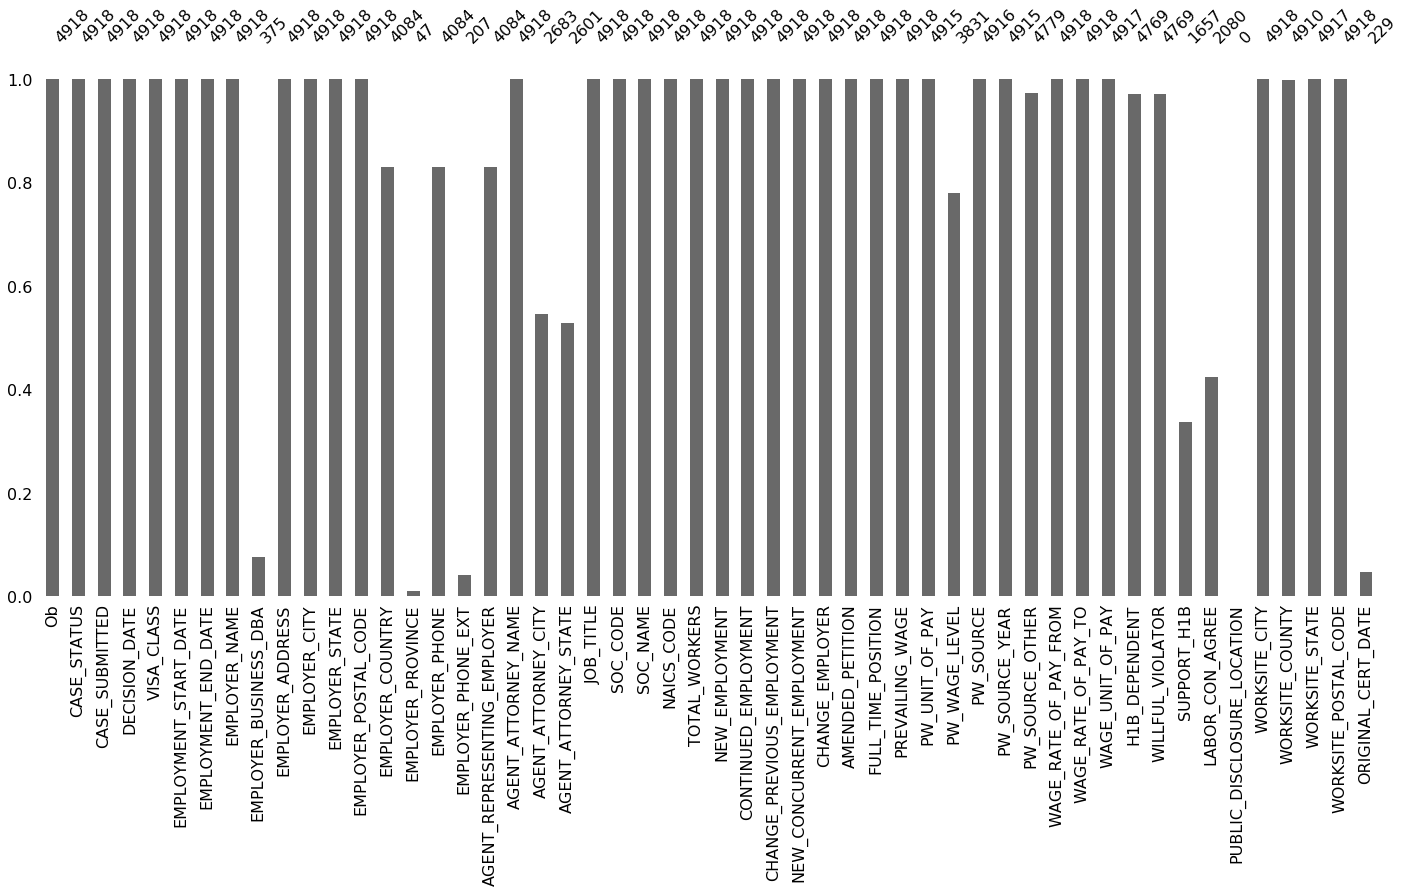

In [1021]:
msno.bar(train)


# The screenshot for number of applicants applied and got approval  for H1b through 2007 -2017

# Reference: https://www.uscis.gov/sites/default/files/USCIS/Resources/Reports%20and%20Studies/Immigration%20Forms%20Data/BAHA/h-1b-2007-2017-trend-tables.pdf

# ![title](USimmigration.png)

# Cleansing and Research to understand feature variables begins..

In [1022]:
%%time
const_cols = [c for c in train.columns if train[c].nunique(dropna=False)==1 ]

CPU times: user 24.6 ms, sys: 1.9 ms, total: 26.5 ms
Wall time: 26.1 ms


In [1023]:
const_cols

['PUBLIC_DISCLOSURE_LOCATION']

#### This confirms that their is only one column with constant value in this case it was complete missing value
#### for the column 'PUBLIC_DISCLOSURE_LOCATION' which we will remove from our dataset

In [1024]:
train.drop('PUBLIC_DISCLOSURE_LOCATION', axis=1, inplace=True)

In [1025]:
# Originally we have 52 columns 
len(train.columns)
columns=train.columns

In [1026]:
percent=train.isnull().sum()*100/len(train)
missing_values_in_percent = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent})

In [1027]:
percent.sort_values(ascending=False)

EMPLOYER_PROVINCE              99.044327
EMPLOYER_PHONE_EXT             95.790972
ORIGINAL_CERT_DATE             95.343636
EMPLOYER_BUSINESS_DBA          92.374949
SUPPORT_H1B                    66.307442
LABOR_CON_AGREE                57.706385
AGENT_ATTORNEY_STATE           47.112647
AGENT_ATTORNEY_CITY            45.445303
PW_WAGE_LEVEL                  22.102481
AGENT_REPRESENTING_EMPLOYER    16.958113
EMPLOYER_PHONE                 16.958113
EMPLOYER_COUNTRY               16.958113
H1B_DEPENDENT                   3.029687
WILLFUL_VIOLATOR                3.029687
PW_SOURCE_OTHER                 2.826352
WORKSITE_COUNTY                 0.162668
PW_UNIT_OF_PAY                  0.061000
PW_SOURCE_YEAR                  0.061000
PW_SOURCE                       0.040667
WAGE_UNIT_OF_PAY                0.020333
WORKSITE_STATE                  0.020333
VISA_CLASS                      0.000000
EMPLOYMENT_START_DATE           0.000000
EMPLOYMENT_END_DATE             0.000000
EMPLOYER_ADDRESS

### Above we can see the features with missing values in percentage

In [1028]:
correlation=train.corr()

In [1029]:
correlation

,Ob,NAICS_CODE,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,PREVAILING_WAGE,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO
Ob,1.000000,0.064186,0.022781,0.002137,0.028662,-0.002243,0.013417,0.022064,0.042443,0.056866,0.070740,0.039226,-0.032139
NAICS_CODE,0.064186,1.000000,-0.068389,-0.024017,-0.030026,-0.027548,-0.036485,-0.028134,-0.083618,-0.005413,-0.014956,0.019242,-0.078954
TOTAL_WORKERS,0.022781,-0.068389,1.000000,0.725277,0.506832,0.338436,0.081172,0.450929,0.465268,0.031872,0.002924,-0.003021,0.078815
NEW_EMPLOYMENT,0.002137,-0.024017,0.725277,1.000000,0.084480,0.032190,0.007098,0.061652,0.036847,-0.030373,-0.018418,-0.046057,0.018932
CONTINUED_EMPLOYMENT,0.028662,-0.030026,0.506832,0.084480,1.000000,0.120104,0.080745,0.309878,0.216302,0.062989,-0.005170,0.039932,0.022644
CHANGE_PREVIOUS_EMPLOYMENT,-0.002243,-0.027548,0.338436,0.032190,0.120104,1.000000,0.062316,0.158567,0.072110,0.024007,0.023756,0.010309,0.044174
NEW_CONCURRENT_EMPLOYMENT,0.013417,-0.036485,0.081172,0.007098,0.080745,0.062316,1.000000,0.026513,0.015665,-0.105212,0.007997,-0.085437,-0.007206
CHANGE_EMPLOYER,0.022064,-0.028134,0.450929,0.061652,0.309878,0.158567,0.026513,1.000000,0.270353,0.072651,-0.007481,0.051604,0.060467
AMENDED_PETITION,0.042443,-0.083618,0.465268,0.036847,0.216302,0.072110,0.015665,0.270353,1.000000,0.043543,0.025233,0.027353,0.077515
PREVAILING_WAGE,0.056866,-0.005413,0.031872,-0.030373,0.062989,0.024007,-0.105212,0.072651,0.043543,1.000000,0.032324,0.804167,0.286451


In [1030]:
len(train['EMPLOYER_CITY'].unique())

874

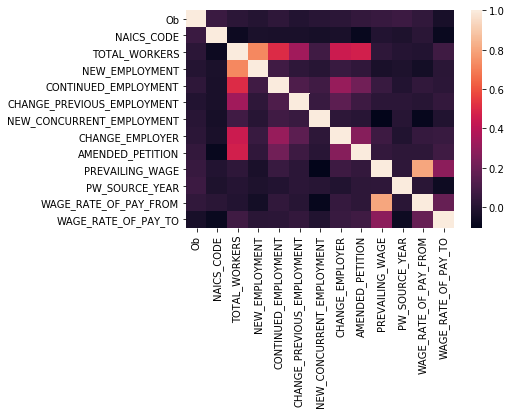

In [1031]:
sns.heatmap(correlation,
           xticklabels=correlation.columns,
        yticklabels=correlation.columns)

## Correlation in the dataset without transformation

In [1032]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

correlation.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Ob,NAICS_CODE,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,PREVAILING_WAGE,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO
Ob,1,0.064,0.023,0.0021,0.029,-0.0022,0.013,0.022,0.042,0.057,0.071,0.039,-0.032
NAICS_CODE,0.064,1,-0.068,-0.024,-0.03,-0.028,-0.036,-0.028,-0.084,-0.0054,-0.015,0.019,-0.079
TOTAL_WORKERS,0.023,-0.068,1,0.73,0.51,0.34,0.081,0.45,0.47,0.032,0.0029,-0.003,0.079
NEW_EMPLOYMENT,0.0021,-0.024,0.73,1,0.084,0.032,0.0071,0.062,0.037,-0.03,-0.018,-0.046,0.019
CONTINUED_EMPLOYMENT,0.029,-0.03,0.51,0.084,1,0.12,0.081,0.31,0.22,0.063,-0.0052,0.04,0.023
CHANGE_PREVIOUS_EMPLOYMENT,-0.0022,-0.028,0.34,0.032,0.12,1,0.062,0.16,0.072,0.024,0.024,0.01,0.044
NEW_CONCURRENT_EMPLOYMENT,0.013,-0.036,0.081,0.0071,0.081,0.062,1,0.027,0.016,-0.11,0.008,-0.085,-0.0072
CHANGE_EMPLOYER,0.022,-0.028,0.45,0.062,0.31,0.16,0.027,1,0.27,0.073,-0.0075,0.052,0.06
AMENDED_PETITION,0.042,-0.084,0.47,0.037,0.22,0.072,0.016,0.27,1,0.044,0.025,0.027,0.078
PREVAILING_WAGE,0.057,-0.0054,0.032,-0.03,0.063,0.024,-0.11,0.073,0.044,1,0.032,0.8,0.29


### How many applicants were approved VS denied for the visa

In [1033]:
target=train['CASE_STATUS'].value_counts()
print("Visa Declined ",(2068/(2068+2850)),"%")

Visa Declined  0.42049613664091096 %



#### This shows 42.0 percent visa were declined 

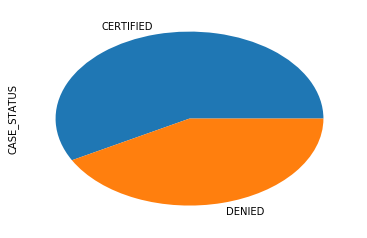

In [1034]:
target.plot.pie()
# Same information visually

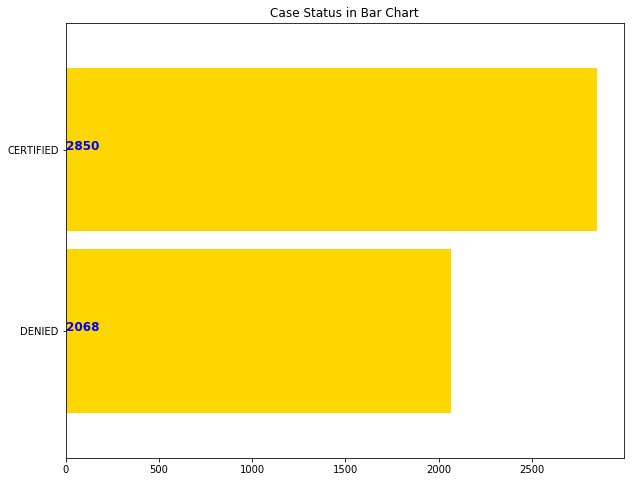

In [1035]:
plt.figure(figsize=(10,8))
ax=train['CASE_STATUS'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color='#ffd700')
for i, v in enumerate(train['CASE_STATUS'].value_counts().sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='b',weight='bold')
plt.title('Case Status in Bar Chart')
plt.show()

# Further Exploration

##### Before moving ahead and removing any information we would like to understand the features

In [1036]:
employer=train['EMPLOYER_BUSINESS_DBA'].value_counts()
employer

MASTECH DIGITAL TECHNOLOGIES, INC.                 6
INSTITUTION OF HIGHER EDUCATION                    6
MEDPRO                                             4
BLOOMBERG                                          4
2 TOWER CENTER BLVD                                4
UNIVERSITY OF PENNSYLVANIA                         4
CREDIT SUISSE                                      3
CA TECHNOLOGIES                                    3
CNSI                                               3
ETA                                                3
VEDICSOFT                                          3
--                                                 2
COMPWORLDWIDE                                      2
NYU SCHOOL OF MEDICINE                             2
NONE                                               2
GABLES ESTATES TAX & ADVISORY SERVICES, P.A.       2
INTERNATIONAL TECHNOLOGICAL UNIVERSITY             2
SELECT REHABILITATION                              2
WWW.MOVERS.COM                                

In [1037]:
employers=employer[:10]

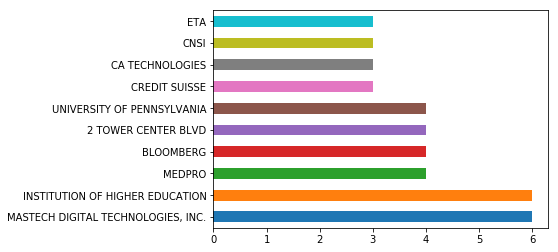

In [1038]:
employers.plot.barh()

In [1039]:
keyplayers=train['EMPLOYER_NAME'].value_counts()
keyplayers

IBM INDIA PRIVATE LIMITED                                 128
INFOSYS LIMITED                                            92
IBM CORPORATION                                            65
TATA CONSULTANCY SERVICES LIMITED                          62
CAPGEMINI AMERICA INC                                      56
DELOITTE CONSULTING LLP                                    42
TECH MAHINDRA (AMERICAS),INC.                              39
ERNST & YOUNG U.S. LLP                                     38
MICROSOFT CORPORATION                                      35
AMAZON CORPORATE LLC                                       34
GOOGLE INC.                                                32
WIPRO LIMITED                                              31
ACCENTURE LLP                                              30
HCL AMERICA, INC.                                          22
L&T TECHNOLOGY SERVICES LIMITED                            22
LARSEN & TOUBRO INFOTECH LIMITED                           20
SYNTEL C

In [1040]:
top10companies=keyplayers[:10]
top10companies

IBM INDIA PRIVATE LIMITED            128
INFOSYS LIMITED                       92
IBM CORPORATION                       65
TATA CONSULTANCY SERVICES LIMITED     62
CAPGEMINI AMERICA INC                 56
DELOITTE CONSULTING LLP               42
TECH MAHINDRA (AMERICAS),INC.         39
ERNST & YOUNG U.S. LLP                38
MICROSOFT CORPORATION                 35
AMAZON CORPORATE LLC                  34
Name: EMPLOYER_NAME, dtype: int64

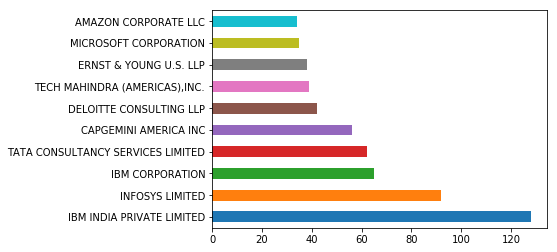

In [1041]:
top10companies.plot.barh()

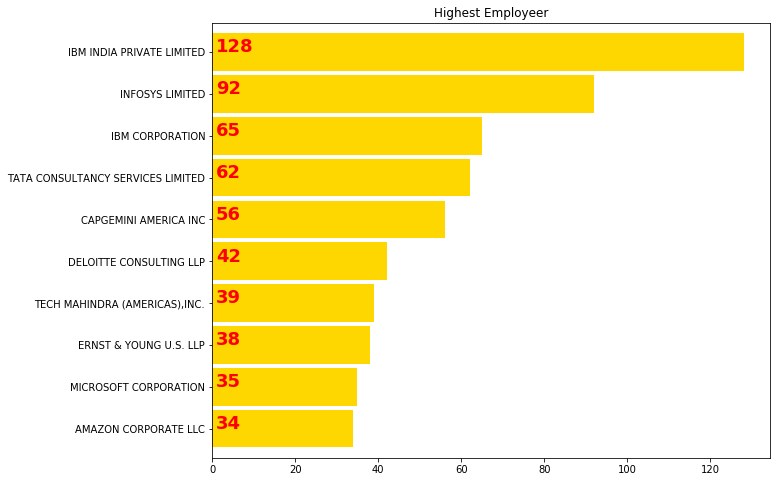

In [1042]:
plt.figure(figsize=(10,8))
ax=train['EMPLOYER_NAME'].value_counts().sort_values(ascending=False)[:10].plot.barh(width=0.9,color='#ffd700')
for i, v in enumerate(train['EMPLOYER_NAME'].value_counts().sort_values(ascending=False).values[:10]): 
    ax.text(.9, i, v,fontsize=18,color='r',weight='bold')
plt.title('Highest Employeer')
fig=plt.gca()
fig.invert_yaxis()
plt.show()

# Let us find the Acceptance rate of the Employers

In [1043]:
emp_rate1=train[train['CASE_STATUS']=='CERTIFIED']
emp_rate1=emp_rate1.groupby(['EMPLOYER_NAME','CASE_STATUS'])['CASE_SUBMITTED'].count().reset_index()
emp_rate2=train[train['CASE_STATUS']=='DENIED']
emp_rate2=emp_rate2.groupby(['EMPLOYER_NAME','CASE_STATUS'])['CASE_SUBMITTED'].count().reset_index()
aa1=emp_rate2.sort_values('CASE_SUBMITTED',ascending=False)[:100]
aa2=emp_rate1.sort_values('CASE_SUBMITTED',ascending=False)[:100]
aa3=aa2.merge(aa1,left_on='EMPLOYER_NAME',right_on='EMPLOYER_NAME',how='left').dropna()
aa3['Acceptance_rate']=aa3['CASE_SUBMITTED_x']/(aa3['CASE_SUBMITTED_x']+aa3['CASE_SUBMITTED_y'])
aa3.sort_values('Acceptance_rate',ascending=False)[['EMPLOYER_NAME','Acceptance_rate']][:15]

,EMPLOYER_NAME,Acceptance_rate
7,MICROSOFT CORPORATION,0.914286
1,TATA CONSULTANCY SERVICES LIMITED,0.887097
6,ERNST & YOUNG U.S. LLP,0.868421
15,COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION,0.812500
2,CAPGEMINI AMERICA INC,0.803571
5,DELOITTE CONSULTING LLP,0.785714
9,WIPRO LIMITED,0.774194
34,TECHLAND INC,0.750000
43,SOGETI USA LLC,0.714286
44,BANK OF AMERICA N.A.,0.714286


In [1044]:
data_peeps=train.dropna(subset=['JOB_TITLE'])
data_peeps=data_peeps[data_peeps['JOB_TITLE'].str.contains('DATA')]
data_scientists=data_peeps[data_peeps['JOB_TITLE'].str.contains('DATA SCIENTIST')]
data_analyst=data_peeps[data_peeps['JOB_TITLE'].str.contains('DATA ANALYST')]
data_eng=data_peeps[data_peeps['JOB_TITLE'].str.contains('DATA ENG')]

## Let's prepare dataset for Machine Learning
#### In this section we will focus on handling missing values, converting categorical values to numerical. We need to handle missing values and before feeding the data into machine learning algorithm because the mathematics under most machine learning models assume the data is numeric and contains no missing values

#### I have replaced the all missing values in column EMPLOYER_BUSINESS_DBA  

In [983]:
#train[train['EMPLOYER_COUNTRY']==train['EMPLOYER_COUNTRY'].idxmax()]

In [984]:

train.drop(['EMPLOYER_COUNTRY'], axis = 1, inplace = True)


In [985]:
states=train.EMPLOYER_STATE.value_counts(dropna=False)

top_states=states[:15]
top_states

CA    877
TX    577
NJ    570
NY    399
IL    291
NC    240
MI    198
PA    193
MA    169
WA    152
GA    149
VA    145
FL    142
MD    119
OH     84
Name: EMPLOYER_STATE, dtype: int64

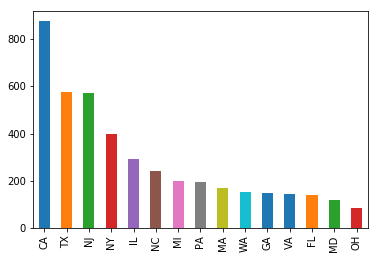

In [986]:
top_states.plot.bar()

# Tidy Data

In [987]:
train.head()

,Ob,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,...,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,1,DENIED,5/25/2017,5/25/2017,H-1B,9/21/2017,9/20/2020,VERTISYSTEM INC,0,39300 CIVIC CENTER DRIVE,...,Year,Y,N,Y,Y,SUNNYVALE,SANTA CLARA,CA,94085,NaN
1,2,DENIED,11/4/2014,8/16/2017,H-1B,12/8/2014,12/7/2017,GOOGLE INC.,0,1600 AMPHITHEATRE PARKWAY,...,Year,N,N,NaN,NaN,MOUNTAIN VIEW,SANTA CLARA,CA,94043,NaN
2,3,DENIED,10/6/2016,10/13/2016,H-1B,11/11/2016,11/10/2019,"KIMBERLY-CLARK WORLDWIDE, INC.",0,2001 MARATHON AVE.,...,Year,N,N,NaN,NaN,NEENAH,WINNEBAGO,WI,54956,NaN
3,4,DENIED,8/14/2017,8/14/2017,H-1B,8/14/2017,8/14/2020,"EMBTEL, INC.",0,39159 PASEO PADRE PARKWAY,...,Year,Y,N,Y,Y,CHARLOTTE,MECKLENBURG,NC,28202,NaN
4,5,DENIED,4/20/2017,4/20/2017,H-1B,10/16/2017,10/15/2020,"SPACE TIME INSIGHT, INC.",0,1850 GATEWAY DR.,...,Year,N,N,NaN,NaN,MEMPHIS,SHELBY,TN,38125,NaN


## Cleansing 1.1 
#### Date Transformation: All the dates are in string format which we would like to convert into date
#### * We would like to see the difference of date that is employment starting date and employment end date. 
#### * We would like to see the processing time of decision making 
#### We will add a new column for each employment duration and processing time

In [988]:
# Here we have transformed all the string formated dates to date format
%timeit
from datetime import datetime
train['EMPLOYMENT_START_DATE']=pd.to_datetime(train['EMPLOYMENT_START_DATE'])
train['EMPLOYMENT_END_DATE']=pd.to_datetime(train['EMPLOYMENT_END_DATE'])
train['CASE_SUBMITTED']=pd.to_datetime(train['CASE_SUBMITTED'])
train['DECISION_DATE']=pd.to_datetime(train['DECISION_DATE'])

In [989]:
# Verification of date format transformation

train.describe()

,Ob,NAICS_CODE,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,PREVAILING_WAGE,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO
count,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4915.000000,4918.000000,4918.000000
mean,2459.500000,438568.020130,1.699268,0.766165,0.296869,0.110411,0.008337,0.231802,0.269622,71229.232574,2016.120041,82009.587885,25095.936682
std,1419.848642,204422.510048,3.857599,2.605320,1.166491,0.943281,0.105433,0.836398,1.224660,34648.534323,0.742782,48850.029727,53984.001841
min,1.000000,2122.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2001.000000,0.000000,0.000000
25%,1230.250000,424240.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55895.000000,2016.000000,61922.000000,0.000000
50%,2459.500000,541511.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69628.000000,2016.000000,75795.000000,0.000000
75%,3688.750000,541511.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88067.000000,2017.000000,100000.000000,0.000000
max,4918.000000,926130.000000,75.000000,75.000000,50.000000,50.000000,2.000000,15.000000,15.000000,336000.000000,2017.000000,850000.000000,804391.000000


In [1045]:
train.head()

,Ob,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,...,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,1,DENIED,5/25/2017,5/25/2017,H-1B,9/21/2017,9/20/2020,VERTISYSTEM INC,NaN,39300 CIVIC CENTER DRIVE,...,Year,Y,N,Y,Y,SUNNYVALE,SANTA CLARA,CA,94085,NaN
1,2,DENIED,11/4/2014,8/16/2017,H-1B,12/8/2014,12/7/2017,GOOGLE INC.,NaN,1600 AMPHITHEATRE PARKWAY,...,Year,N,N,NaN,NaN,MOUNTAIN VIEW,SANTA CLARA,CA,94043,NaN
2,3,DENIED,10/6/2016,10/13/2016,H-1B,11/11/2016,11/10/2019,"KIMBERLY-CLARK WORLDWIDE, INC.",NaN,2001 MARATHON AVE.,...,Year,N,N,NaN,NaN,NEENAH,WINNEBAGO,WI,54956,NaN
3,4,DENIED,8/14/2017,8/14/2017,H-1B,8/14/2017,8/14/2020,"EMBTEL, INC.",NaN,39159 PASEO PADRE PARKWAY,...,Year,Y,N,Y,Y,CHARLOTTE,MECKLENBURG,NC,28202,NaN
4,5,DENIED,4/20/2017,4/20/2017,H-1B,10/16/2017,10/15/2020,"SPACE TIME INSIGHT, INC.",NaN,1850 GATEWAY DR.,...,Year,N,N,NaN,NaN,MEMPHIS,SHELBY,TN,38125,NaN


In [1084]:
# We will add a column each to see the difference between the date
start_employment=train['EMPLOYMENT_START_DATE']
end_employment=train['EMPLOYMENT_END_DATE']
case_submission_date=train['CASE_SUBMITTED']
Decision_date=train['DECISION_DATE']

train['Employment_duration']= end_employment - start_employment
train['Processing_time']  = Decision_date - case_submission_date

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [1047]:
train.head()

,Ob,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,...,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,1,DENIED,5/25/2017,5/25/2017,H-1B,9/21/2017,9/20/2020,VERTISYSTEM INC,NaN,39300 CIVIC CENTER DRIVE,...,Year,Y,N,Y,Y,SUNNYVALE,SANTA CLARA,CA,94085,NaN
1,2,DENIED,11/4/2014,8/16/2017,H-1B,12/8/2014,12/7/2017,GOOGLE INC.,NaN,1600 AMPHITHEATRE PARKWAY,...,Year,N,N,NaN,NaN,MOUNTAIN VIEW,SANTA CLARA,CA,94043,NaN
2,3,DENIED,10/6/2016,10/13/2016,H-1B,11/11/2016,11/10/2019,"KIMBERLY-CLARK WORLDWIDE, INC.",NaN,2001 MARATHON AVE.,...,Year,N,N,NaN,NaN,NEENAH,WINNEBAGO,WI,54956,NaN
3,4,DENIED,8/14/2017,8/14/2017,H-1B,8/14/2017,8/14/2020,"EMBTEL, INC.",NaN,39159 PASEO PADRE PARKWAY,...,Year,Y,N,Y,Y,CHARLOTTE,MECKLENBURG,NC,28202,NaN
4,5,DENIED,4/20/2017,4/20/2017,H-1B,10/16/2017,10/15/2020,"SPACE TIME INSIGHT, INC.",NaN,1850 GATEWAY DR.,...,Year,N,N,NaN,NaN,MEMPHIS,SHELBY,TN,38125,NaN


In [1090]:
summary=train.describe()
summary

,Ob,CASE_STATUS,EMPLOYER_PHONE,EMPLOYER_PHONE_EXT,NAICS_CODE,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,PREVAILING_WAGE,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO
count,4918.000000,4918.000000,4.918000e+03,4.918000e+03,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4915.000000,4918.000000,4918.000000
mean,2459.500000,0.579504,5.117903e+09,2.824193e+02,438568.020130,1.699268,0.766165,0.296869,0.110411,0.008337,0.231802,0.269622,71229.232574,2016.120041,82009.587885,25095.936682
std,1419.848642,0.493689,1.693349e+10,1.436285e+04,204422.510048,3.857599,2.605320,1.166491,0.943281,0.105433,0.836398,1.224660,34648.534323,0.742782,48850.029727,53984.001841
min,1.000000,0.000000,0.000000e+00,0.000000e+00,2122.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2001.000000,0.000000,0.000000
25%,1230.250000,0.000000,2.133941e+09,0.000000e+00,424240.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55895.000000,2016.000000,61922.000000,0.000000
50%,2459.500000,1.000000,4.694673e+09,0.000000e+00,541511.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69628.000000,2016.000000,75795.000000,0.000000
75%,3688.750000,1.000000,7.325055e+09,0.000000e+00,541511.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88067.000000,2017.000000,100000.000000,0.000000
max,4918.000000,1.000000,8.560000e+11,1.004023e+06,926130.000000,75.000000,75.000000,50.000000,50.000000,2.000000,15.000000,15.000000,336000.000000,2017.000000,850000.000000,804391.000000


In [1091]:
summary[['PREVAILING_WAGE','Employment_duration','Processing_time']]

KeyError: "['Employment_duration' 'Processing_time'] not in index"

In [1092]:
train['Processing_time'].median()

KeyError: 'Processing_time'

In [1093]:
train['Processing_time'].mean()

KeyError: 'Processing_time'

In [1087]:
processingtime=train['Processing_time'].value_counts()
process=processingtime[:10]
process

KeyError: 'Processing_time'

In [998]:
duration=train['Employment_duration'].value_counts()

duration
dura=duration[:10]
dura

1095 days    2662
1096 days     896
1094 days     530
729 days      108
1093 days     106
730 days       77
364 days       53
1092 days      20
728 days       11
1065 days      10
Name: Employment_duration, dtype: int64

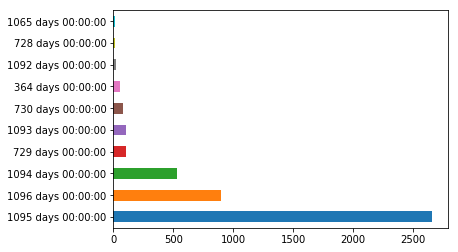

In [999]:
dura.plot.barh()

#### Most of the job offered were 1095 which is 3 years 

In [1000]:
train.shape

(4918, 52)

In [1001]:
print((train[1:53]==0).sum())

Ob                              0
CASE_STATUS                     0
CASE_SUBMITTED                  0
DECISION_DATE                   0
VISA_CLASS                      0
EMPLOYMENT_START_DATE           0
EMPLOYMENT_END_DATE             0
EMPLOYER_NAME                   0
EMPLOYER_BUSINESS_DBA          49
EMPLOYER_ADDRESS                0
EMPLOYER_CITY                   0
EMPLOYER_STATE                  0
EMPLOYER_POSTAL_CODE            0
EMPLOYER_PROVINCE               0
EMPLOYER_PHONE                  0
EMPLOYER_PHONE_EXT              0
AGENT_REPRESENTING_EMPLOYER     0
AGENT_ATTORNEY_NAME             0
AGENT_ATTORNEY_CITY             0
AGENT_ATTORNEY_STATE            0
JOB_TITLE                       0
SOC_CODE                        0
SOC_NAME                        0
NAICS_CODE                      0
TOTAL_WORKERS                   0
NEW_EMPLOYMENT                 28
CONTINUED_EMPLOYMENT           39
CHANGE_PREVIOUS_EMPLOYMENT     49
NEW_CONCURRENT_EMPLOYMENT      52
CHANGE_EMPLOYE

# Cleansing 1.2 Imputing Missing Values and transforming the object variables in number for modeling

In [1094]:
#train.CASE_STATUS.replace(('CERTIFIED', 'DENIED'), (1, 0), inplace=True)
# Changing the CASE_STATUS column to 0 and 1 where 0 = DENIED A and 1 = CERTIFIED


In [1095]:
# SUPPORT_H1B had 3 unique values Y,N and nan this step will replace all nan
# with 2



In [1096]:
train['EMPLOYER_PHONE'] = (
    pd.to_numeric(train['EMPLOYER_PHONE'],
                  errors='coerce')
      .fillna(0)
    )


train['EMPLOYER_PHONE_EXT'] = (
    pd.to_numeric(train['EMPLOYER_PHONE_EXT'],
                  errors='coerce')
      .fillna(0)
    )


 #Replacing NaN value in column with EMPLOYER_PHONE_EXT with 0
train['EMPLOYER_PHONE_EXT'].replace(0, np.nan, inplace= True)
#Replacing NaN value in column with EMPLOYER_PHONE with 0
train['EMPLOYER_PHONE'].replace(0, np.nan, inplace= True)

train['SUPPORT_H1B'].fillna(value=0,inplace=True)
train['EMPLOYER_PHONE'].isna().sum()
# we had 834 missing values i.e employer did not provide phone number which we are converting to 0
train['EMPLOYER_PHONE'].fillna(value=0,inplace=True)
#E_3 = train.loc[train['VISA_CLASS'] == 'E-3 Australian', ['CASE_STATUS']]
#E_3

train['AGENT_ATTORNEY_CITY'].fillna(value=0,inplace=True)
train['AGENT_ATTORNEY_STATE'].fillna(value=0,inplace=True)

train['EMPLOYER_PROVINCE'].fillna(value=0,inplace=True)
train['EMPLOYER_PHONE_EXT'].fillna(value=0,inplace=True)
train['EMPLOYER_BUSINESS_DBA'].fillna(value=0,inplace=True)
train['PW_WAGE_LEVEL'].fillna(value=0,inplace=True)
# We are replacing missing values with 0 for this column 
train['AGENT_REPRESENTING_EMPLOYER'].fillna(value=0,inplace=True)
# this step will replace all the column rows with Y and N to 1 and 0
#train['SUPPORT_H1B']=pd.Series(np.where(train.SUPPORT_H1B.values=='Y',0,1),train.index)
#train['EMPLOYER_PROVINCE'].fillna(value=0,inplace=True)

#COLUMNS TO BE DROPPED
train.drop('PUBLIC_DISCLOSURE_LOCATION', axis=1, inplace=True)
train.drop['EMPLOYER_COUNTRY',axis=1,inplace=True]



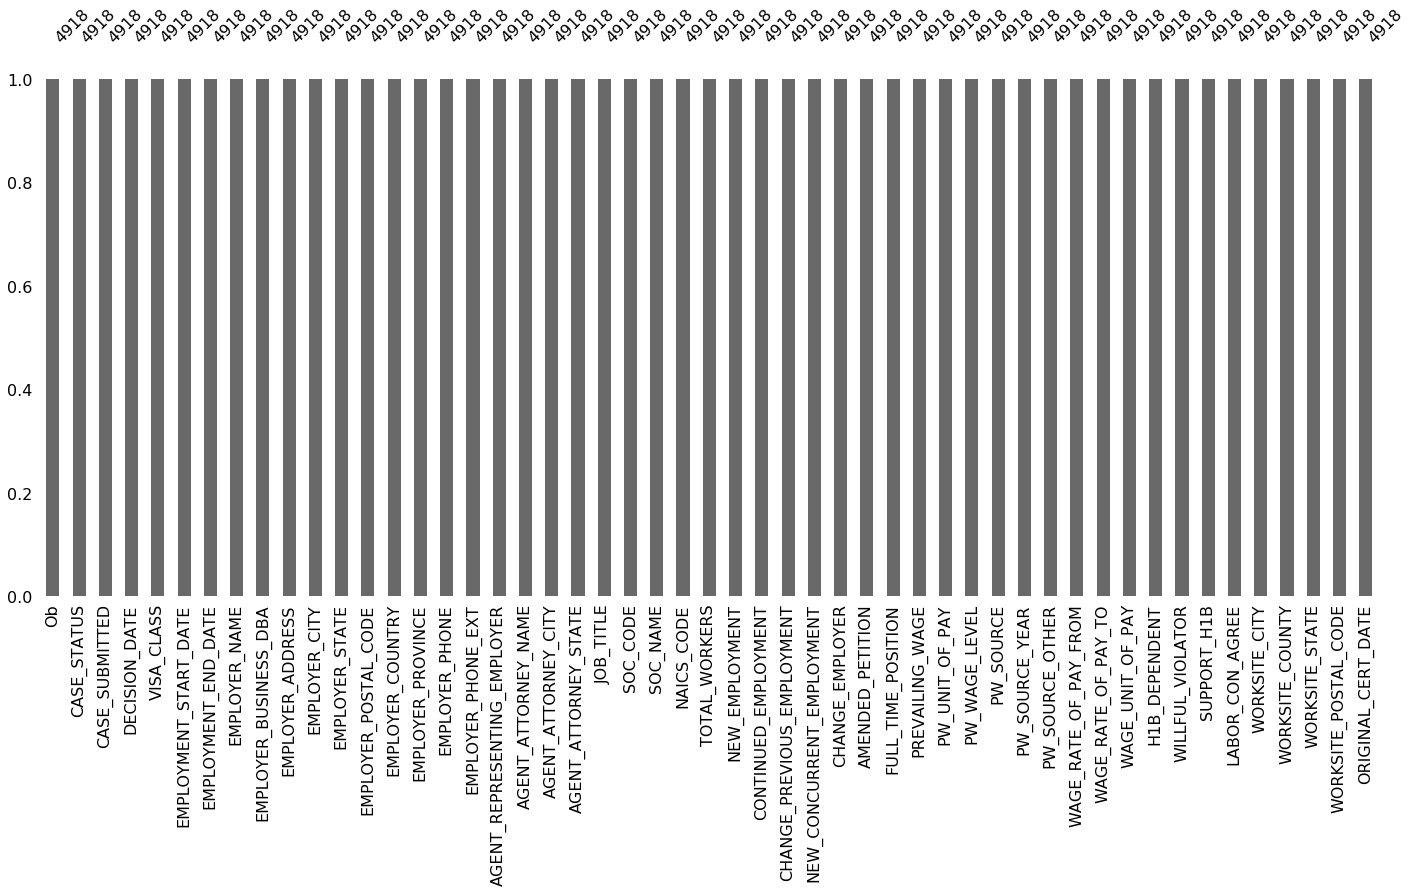

In [1105]:
msno.bar(train)

,Ob,CASE_STATUS,EMPLOYER_PHONE,EMPLOYER_PHONE_EXT,NAICS_CODE,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,PREVAILING_WAGE,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO
Ob,1.000000,0.855007,-0.003063,-0.010392,0.064186,0.022781,0.002137,0.028662,-0.002243,0.013417,0.022064,0.042443,0.056866,0.014352,0.039226,-0.032139
CASE_STATUS,0.855007,1.000000,-0.006168,-0.014974,0.068593,0.040162,0.016038,0.038114,0.000144,0.012661,0.033180,0.047960,0.070730,0.030141,0.053127,-0.030559
EMPLOYER_PHONE,-0.003063,-0.006168,1.000000,-0.001975,0.008429,-0.001057,0.002850,-0.013324,-0.013787,0.001638,-0.008073,-0.016694,-0.034281,-0.002767,-0.026461,-0.016946
EMPLOYER_PHONE_EXT,-0.010392,-0.014974,-0.001975,1.000000,-0.028008,-0.002285,-0.004950,-0.003109,0.000169,0.007575,0.013258,-0.003284,0.005180,0.000454,0.001208,-0.004633
NAICS_CODE,0.064186,0.068593,0.008429,-0.028008,1.000000,-0.068389,-0.024017,-0.030026,-0.027548,-0.036485,-0.028134,-0.083618,-0.005413,0.006681,0.019242,-0.078954
TOTAL_WORKERS,0.022781,0.040162,-0.001057,-0.002285,-0.068389,1.000000,0.725277,0.506832,0.338436,0.081172,0.450929,0.465268,0.031872,0.004522,-0.003021,0.078815
NEW_EMPLOYMENT,0.002137,0.016038,0.002850,-0.004950,-0.024017,0.725277,1.000000,0.084480,0.032190,0.007098,0.061652,0.036847,-0.030373,0.003830,-0.046057,0.018932
CONTINUED_EMPLOYMENT,0.028662,0.038114,-0.013324,-0.003109,-0.030026,0.506832,0.084480,1.000000,0.120104,0.080745,0.309878,0.216302,0.062989,-0.007909,0.039932,0.022644
CHANGE_PREVIOUS_EMPLOYMENT,-0.002243,0.000144,-0.013787,0.000169,-0.027548,0.338436,0.032190,0.120104,1.000000,0.062316,0.158567,0.072110,0.024007,0.003246,0.010309,0.044174
NEW_CONCURRENT_EMPLOYMENT,0.013417,0.012661,0.001638,0.007575,-0.036485,0.081172,0.007098,0.080745,0.062316,1.000000,0.026513,0.015665,-0.105212,0.002073,-0.085437,-0.007206


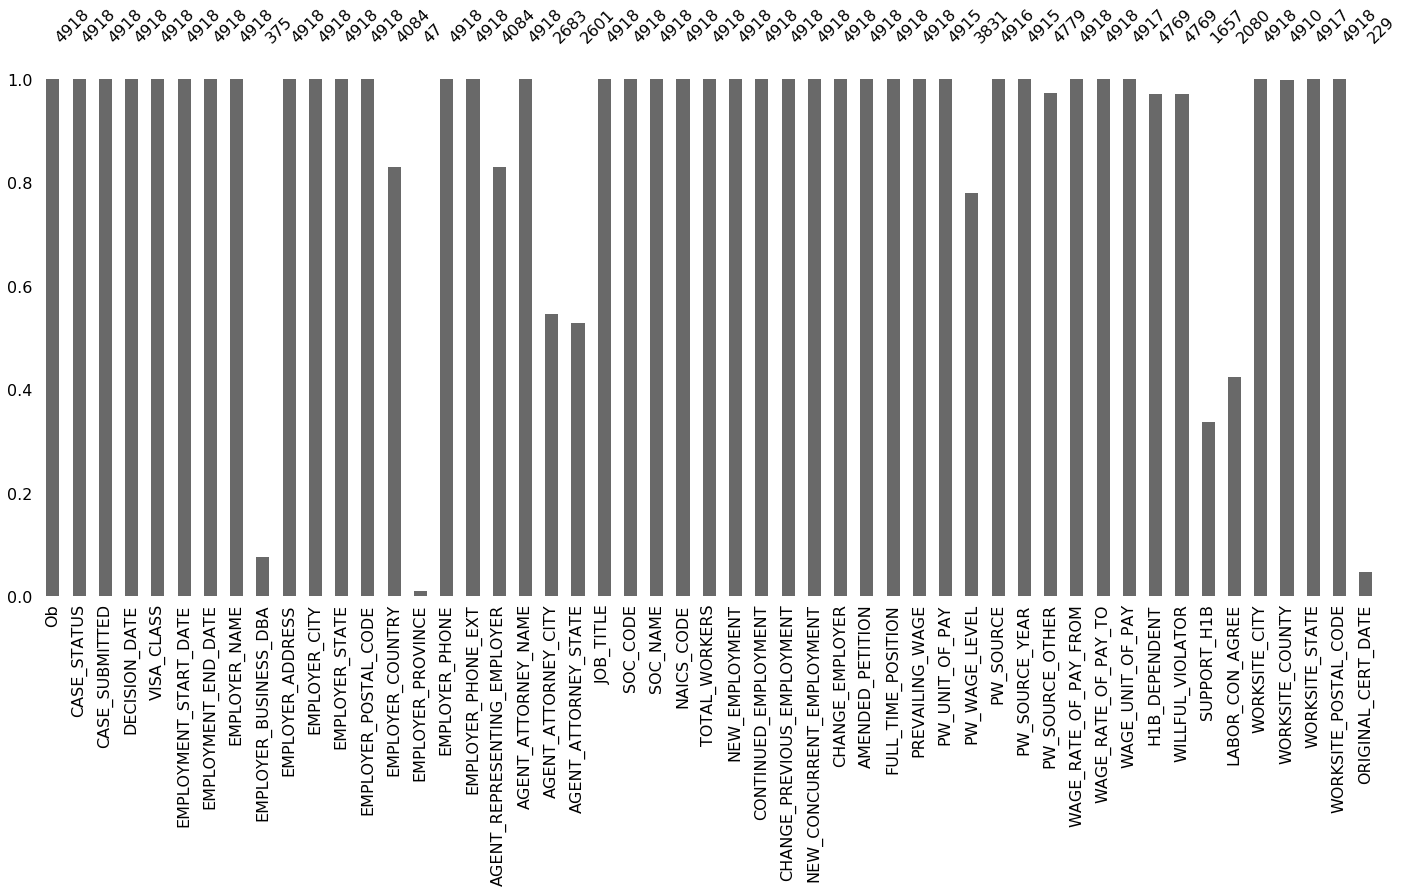

In [1078]:
msno.bar(train)

In [1065]:
#train[['','EMPLOYER_NAME','WAGE_RATE_OF_PAY_TO']] 
wagerate = train.loc[train['WAGE_RATE_OF_PAY_TO'] >0 , ['EMPLOYER_NAME','CASE_STATUS','WAGE_RATE_OF_PAY_TO']]
#df.loc[['viper', 'sidewinder']]
#df.loc['cobra':'viper', 'max_speed']
wagerate.sort_values(by='WAGE_RATE_OF_PAY_TO',ascending=False)

,EMPLOYER_NAME,CASE_STATUS,WAGE_RATE_OF_PAY_TO
2061,BLACK & VEATCH CORPORATION,0,804391.00
1330,"NORTHERN NEVADA MEDICAL GROUP, LLC",0,550000.00
3919,MERCY CLINIC EAST COMMUNITIES,1,480000.00
2152,TEXAS CHILDREN'S PHYSICIAN'S GROUP,1,461120.00
4348,"MICHIGAN CARDIOVASCULAR INSTITUTE, PC",1,425000.00
4783,"PEDIATRIC GROUP OF ACADIANA, LLC",1,388000.00
2708,"MCKINSEY & COMPANY, INC. UNITED STATES",1,375000.00
4366,DARTMOUTH-HITCHCOCK CLINIC,1,350000.00
4721,DELOITTE CONSULTING LLP,1,320200.00
3236,APPLE INC.,1,310000.00


In [1066]:
topjobs=train['JOB_TITLE'].value_counts()
top15jobs=topjobs[:15]
top15jobs

PROGRAMMER ANALYST          317
SOFTWARE ENGINEER           218
SOFTWARE DEVELOPER          121
SYSTEMS ANALYST              77
BUSINESS ANALYST             67
SENIOR SOFTWARE ENGINEER     58
COMPUTER PROGRAMMER          45
COMPUTER SYSTEMS ANALYST     44
ASSISTANT PROFESSOR          43
APPLICATION DEVELOPER        38
ACCOUNTANT                   32
JAVA DEVELOPER               29
PROJECT MANAGER              26
SENIOR CONSULTANT            26
DEVELOPER USER INTERFACE     26
Name: JOB_TITLE, dtype: int64

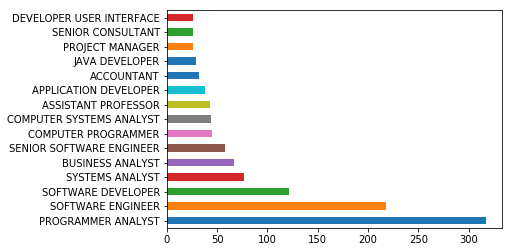

In [1067]:
top15jobs.plot.barh()

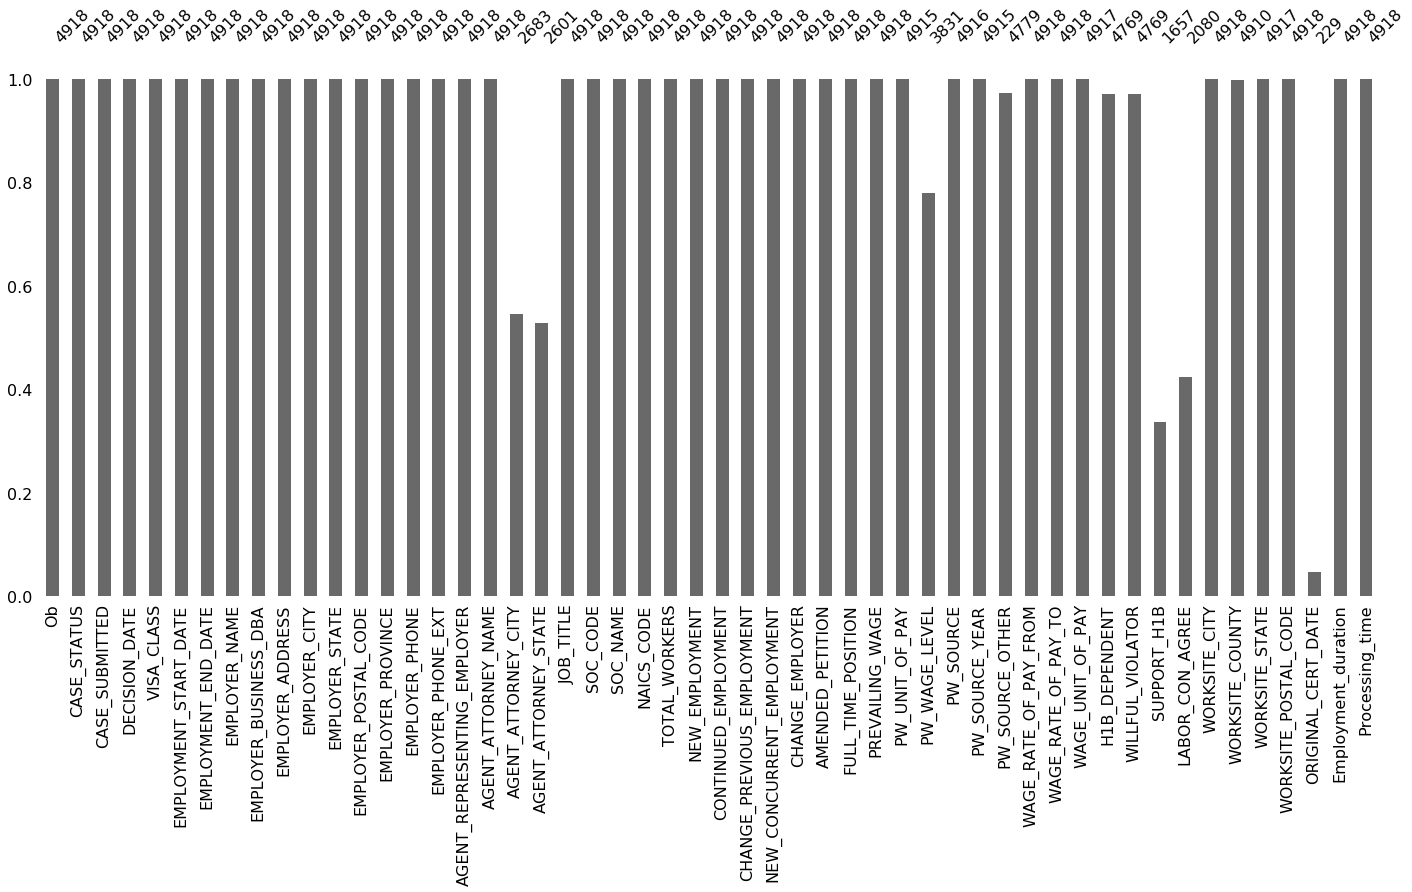

In [773]:
msno.bar(train)

834

In [766]:
train['EMPLOYER_PHONE_EXT'].isna().sum()

4711

834

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


# Select all the categorical columns

In [780]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4918 entries, 0 to 4917
Data columns (total 52 columns):
Ob                             4918 non-null int64
CASE_STATUS                    4918 non-null int64
CASE_SUBMITTED                 4918 non-null datetime64[ns]
DECISION_DATE                  4918 non-null datetime64[ns]
VISA_CLASS                     4918 non-null object
EMPLOYMENT_START_DATE          4918 non-null datetime64[ns]
EMPLOYMENT_END_DATE            4918 non-null datetime64[ns]
EMPLOYER_NAME                  4918 non-null object
EMPLOYER_BUSINESS_DBA          4918 non-null object
EMPLOYER_ADDRESS               4918 non-null object
EMPLOYER_CITY                  4918 non-null object
EMPLOYER_STATE                 4918 non-null object
EMPLOYER_POSTAL_CODE           4918 non-null object
EMPLOYER_PROVINCE              4918 non-null object
EMPLOYER_PHONE                 4918 non-null object
EMPLOYER_PHONE_EXT             4918 non-null object
AGENT_REPRESENTING_EMPLOYER    

In [ ]:
cat_col['']

In [818]:
cat_col = train.select_dtypes(include=['object']).copy()
cat_col

,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_PROVINCE,EMPLOYER_PHONE,EMPLOYER_PHONE_EXT,...,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,H-1B,VERTISYSTEM INC,0,39300 CIVIC CENTER DRIVE,FREMONT,CA,94538,0,5107948099,0,...,Year,Y,N,Y,Y,SUNNYVALE,SANTA CLARA,CA,94085,NaN
1,H-1B,GOOGLE INC.,0,1600 AMPHITHEATRE PARKWAY,MOUNTAIN VIEW,CA,94043,0,0,0,...,Year,N,N,NaN,NaN,MOUNTAIN VIEW,SANTA CLARA,CA,94043,NaN
2,H-1B,"KIMBERLY-CLARK WORLDWIDE, INC.",0,2001 MARATHON AVE.,NEENAH,WI,54956,0,9207215200,0,...,Year,N,N,NaN,NaN,NEENAH,WINNEBAGO,WI,54956,NaN
3,H-1B,"EMBTEL, INC.",0,39159 PASEO PADRE PARKWAY,FREMONT,CA,94538,0,0,0,...,Year,Y,N,Y,Y,CHARLOTTE,MECKLENBURG,NC,28202,NaN
4,H-1B,"SPACE TIME INSIGHT, INC.",0,1850 GATEWAY DR.,SAN MATEO,CA,94404,0,6505138550,0,...,Year,N,N,NaN,NaN,MEMPHIS,SHELBY,TN,38125,NaN
5,H-1B,"VERITIS GROUP, INC.",0,1231 GREENWAY DR.,IRVING,TX,75038,0,0,0,...,Year,Y,N,Y,NaN,IRVING,DALLAS,TX,75038,NaN
6,H-1B,MAXOTECH SOLUTIONS LLC,0,1920 MCKINNEY AVE,DALLAS,TX,75201,0,2162125823,0,...,Year,N,N,Y,NaN,DALLAS,DALLAS,TX,75201,NaN
7,H-1B,FOX ROTHSCHILD LLP,0,2000 MARKET STREET,PHILADELPHIA,PA,19103-3222,0,2152992000,0,...,Year,N,N,NaN,NaN,LAS VEGAS,CLARK,NV,89135,NaN
8,H-1B,JPMORGAN CHASE & CO.,0,10 S. DEARBORN STREET,CHICAGO,IL,60603,0,3127325466,0,...,Year,N,N,NaN,NaN,COLUMBUS,DELAWARE,OH,43240,NaN
9,H-1B,AKUNA CAPITAL LLC,AKUNA CAPITAL LLC,333 S WABASH AVENUE,CHICAGO,IL,60604,0,3129944640,0,...,Year,N,N,NaN,NaN,CHICAGO,COOK,IL,60604,NaN


In [831]:
cat_colum=['VISA_CLASS', 'EMPLOYER_NAME', 'EMPLOYER_BUSINESS_DBA',
       'EMPLOYER_ADDRESS', 'EMPLOYER_CITY', 'EMPLOYER_STATE',
       'EMPLOYER_POSTAL_CODE', 'EMPLOYER_PROVINCE', 'EMPLOYER_PHONE',
       'EMPLOYER_PHONE_EXT', 'AGENT_REPRESENTING_EMPLOYER',
       'AGENT_ATTORNEY_NAME', 'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE',
       'JOB_TITLE', 'SOC_CODE', 'SOC_NAME', 'FULL_TIME_POSITION',
       'PW_UNIT_OF_PAY', 'PW_WAGE_LEVEL', 'PW_SOURCE', 'PW_SOURCE_OTHER',
       'WAGE_UNIT_OF_PAY', 'H1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'SUPPORT_H1B',
       'LABOR_CON_AGREE', 'WORKSITE_CITY', 'WORKSITE_COUNTY', 'WORKSITE_STATE',
       'WORKSITE_POSTAL_CODE', 'ORIGINAL_CERT_DATE']

In [845]:
cat_col

,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_PROVINCE,EMPLOYER_PHONE,EMPLOYER_PHONE_EXT,...,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,H-1B,VERTISYSTEM INC,0,39300 CIVIC CENTER DRIVE,FREMONT,CA,94538,0,5107948099,0,...,Year,Y,N,Y,Y,SUNNYVALE,SANTA CLARA,CA,94085,NaN
1,H-1B,GOOGLE INC.,0,1600 AMPHITHEATRE PARKWAY,MOUNTAIN VIEW,CA,94043,0,0,0,...,Year,N,N,NaN,NaN,MOUNTAIN VIEW,SANTA CLARA,CA,94043,NaN
2,H-1B,"KIMBERLY-CLARK WORLDWIDE, INC.",0,2001 MARATHON AVE.,NEENAH,WI,54956,0,9207215200,0,...,Year,N,N,NaN,NaN,NEENAH,WINNEBAGO,WI,54956,NaN
3,H-1B,"EMBTEL, INC.",0,39159 PASEO PADRE PARKWAY,FREMONT,CA,94538,0,0,0,...,Year,Y,N,Y,Y,CHARLOTTE,MECKLENBURG,NC,28202,NaN
4,H-1B,"SPACE TIME INSIGHT, INC.",0,1850 GATEWAY DR.,SAN MATEO,CA,94404,0,6505138550,0,...,Year,N,N,NaN,NaN,MEMPHIS,SHELBY,TN,38125,NaN
5,H-1B,"VERITIS GROUP, INC.",0,1231 GREENWAY DR.,IRVING,TX,75038,0,0,0,...,Year,Y,N,Y,NaN,IRVING,DALLAS,TX,75038,NaN
6,H-1B,MAXOTECH SOLUTIONS LLC,0,1920 MCKINNEY AVE,DALLAS,TX,75201,0,2162125823,0,...,Year,N,N,Y,NaN,DALLAS,DALLAS,TX,75201,NaN
7,H-1B,FOX ROTHSCHILD LLP,0,2000 MARKET STREET,PHILADELPHIA,PA,19103-3222,0,2152992000,0,...,Year,N,N,NaN,NaN,LAS VEGAS,CLARK,NV,89135,NaN
8,H-1B,JPMORGAN CHASE & CO.,0,10 S. DEARBORN STREET,CHICAGO,IL,60603,0,3127325466,0,...,Year,N,N,NaN,NaN,COLUMBUS,DELAWARE,OH,43240,NaN
9,H-1B,AKUNA CAPITAL LLC,AKUNA CAPITAL LLC,333 S WABASH AVENUE,CHICAGO,IL,60604,0,3129944640,0,...,Year,N,N,NaN,NaN,CHICAGO,COOK,IL,60604,NaN


In [920]:
train.dtypes

Ob                               int64
CASE_STATUS                     object
CASE_SUBMITTED                  object
DECISION_DATE                   object
VISA_CLASS                      object
EMPLOYMENT_START_DATE           object
EMPLOYMENT_END_DATE             object
EMPLOYER_NAME                   object
EMPLOYER_BUSINESS_DBA           object
EMPLOYER_ADDRESS                object
EMPLOYER_CITY                   object
EMPLOYER_STATE                  object
EMPLOYER_POSTAL_CODE            object
EMPLOYER_COUNTRY                object
EMPLOYER_PROVINCE               object
EMPLOYER_PHONE                  object
EMPLOYER_PHONE_EXT              object
AGENT_REPRESENTING_EMPLOYER     object
AGENT_ATTORNEY_NAME             object
AGENT_ATTORNEY_CITY             object
AGENT_ATTORNEY_STATE            object
JOB_TITLE                       object
SOC_CODE                        object
SOC_NAME                        object
NAICS_CODE                       int64
TOTAL_WORKERS            